# Dependencies and Set Up

In [4]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
#from utility import check_columns
import scipy.stats as st
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy import stats


# Import .csv and conver to a df
file_GDP = 'raw_data/GDP_OECD_v2.csv'
GDP_df = pd.read_csv(file_GDP, index_col=1)

#replace country abbreviations with names
GDP_dfv2=GDP_df.replace({'LOCATION': {'AUS':'Australia', 'AUT': 'Austria', 'BEL': 'Belgium', 
                             'CAN': 'Canada', 'CZE': 'Czech Republic', 'DNK': 'Denmark',
                             'FIN': 'Finland', 'FRA': 'France',  'DEU': 'Germany',                           
                             'GRC': 'Greece', 'HUN': 'Hungary',  'ISL': 'Iceland',
                             'IRL': 'Ireland', 'ITA': 'Italy', 'JPN': 'Japan',
                             'KOR': 'Korea','LUX': 'Luxembourg', 'MEX': 'Mexico', 
                             'NLD': 'Netherlands',  'NZL': 'New Zealand', 'NOR': 'Norway',
                             'POL': 'Poland','PRT': 'Portugal','SVK': 'Slovak Republic',
                             'SVN': 'Slovenia','ESP': 'Spain','SWE': 'Sweden', 'GBR': 'United Kingdom',
                             'TUR': 'Turkey',  'USA': 'United States','CHE': 'Sitzerland',
                             'CHL': 'Chile', 'EST': 'Estonia','ISR': 'Israel',
                             'LVA': 'Latvia', 'LTU': 'Lithuania'}
                            })
#GDP_df.head()
GDP_dfv2.head()

,LOCATION,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
INDICATOR,,,,,,,
GDP,Australia,TOT,USD_CAP,A,2009,41614.09072,NaN
GDP,Australia,TOT,USD_CAP,A,2010,42787.06596,NaN
GDP,Australia,TOT,USD_CAP,A,2011,44419.30975,NaN
GDP,Australia,TOT,USD_CAP,A,2012,43879.18036,NaN
GDP,Australia,TOT,USD_CAP,A,2013,47761.21406,NaN


In [5]:
GDP_dfv2['LOCATION'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Japan', 'Korea', 'Luxembourg',
       'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
       'Portugal', 'Slovak Republic', 'Spain', 'Sweden', 'Sitzerland',
       'Turkey', 'United Kingdom', 'United States', 'Chile', 'CHN', 'COL',
       'Estonia', 'IND', 'IDN', 'Israel', 'RUS', 'Slovenia', 'ZAF',
       'EU28', 'OECD', 'OECDE', 'Latvia', 'BRA', 'Lithuania', 'SAU',
       'EA19', 'ARG', 'CRI', 'BGR', 'HRV', 'CYP', 'MLT', 'PER', 'ROU',
       'MKD', 'ZMB', 'HKG', 'MDG', 'MAR', 'SGP'], dtype=object)

In [7]:
#rename columns
GDP_dfv2.rename(columns={'LOCATION': 'Country', 'TIME': 'Year'}, inplace=True)
GDP_dfv2.head()

,Country,SUBJECT,MEASURE,FREQUENCY,Year,Value,Flag Codes
INDICATOR,,,,,,,
GDP,Australia,TOT,USD_CAP,A,2009,41614.09072,NaN
GDP,Australia,TOT,USD_CAP,A,2010,42787.06596,NaN
GDP,Australia,TOT,USD_CAP,A,2011,44419.30975,NaN
GDP,Australia,TOT,USD_CAP,A,2012,43879.18036,NaN
GDP,Australia,TOT,USD_CAP,A,2013,47761.21406,NaN


In [9]:
# Import union density data
file_Union = 'raw_data/uniondata.csv'
union_df = pd.read_csv(file_Union, index_col=0)
union_df.head()

,Country,Source,Series,Year,Unit,Value
54,Hungary,Survey data,Trade union density,2004,Percentage,16.8
55,Hungary,Survey data,Trade union density,2009,Percentage,11.9
56,Hungary,Survey data,Trade union density,2015,Percentage,9.0
94,Poland,Administrative data,Trade union density,1999,Percentage,29.1
95,Poland,Administrative data,Trade union density,2000,Percentage,24.7


In [10]:
union_df['Country'].unique()

array(['Hungary', 'Poland', 'Mexico', 'Sweden', 'France', 'Norway',
       'Iceland', 'Latvia', 'Estonia', 'Switzerland', 'Belgium', 'Israel',
       'Canada', 'New Zealand', 'Ireland', 'Chile', 'Spain', 'Finland',
       'Luxembourg', 'Korea', 'United Kingdom', 'Australia',
       'Netherlands', 'Turkey', 'Greece', 'Austria', 'Denmark',
       'Slovak Republic', 'Slovenia', 'Japan', 'Czech Republic',
       'Germany', 'Portugal', 'Italy', 'Lithuania', 'United States'],
      dtype=object)

In [11]:
GDP_data_complete = union_df.merge(GDP_dfv2, on=["Country", "Year"])
GDP_data_complete

,Country,Source,Series,Year,Unit,Value_x,SUBJECT,MEASURE,FREQUENCY,Value_y,Flag Codes
0,Hungary,Survey data,Trade union density,2009,Percentage,11.9,TOT,USD_CAP,A,20689.04670,NaN
1,Hungary,Survey data,Trade union density,2015,Percentage,9.0,TOT,USD_CAP,A,26777.47046,NaN
2,Hungary,Administrative data,Trade union density,2015,Percentage,9.4,TOT,USD_CAP,A,26777.47046,NaN
3,Poland,Administrative data,Trade union density,2009,Percentage,16.3,TOT,USD_CAP,A,19088.28902,NaN
4,Poland,Administrative data,Trade union density,2010,Percentage,18.3,TOT,USD_CAP,A,20828.98653,NaN
...,...,...,...,...,...,...,...,...,...,...,...
396,United States,Survey data,Trade union density,2014,Percentage,10.7,TOT,USD_CAP,A,55008.01240,NaN
397,United States,Survey data,Trade union density,2015,Percentage,10.6,TOT,USD_CAP,A,56831.65482,NaN
398,United States,Survey data,Trade union density,2016,Percentage,10.3,TOT,USD_CAP,A,58000.88803,NaN
399,United States,Survey data,Trade union density,2017,Percentage,10.3,TOT,USD_CAP,A,60091.56878,NaN


In [12]:
GDP_data_complete.to_csv('output/consolidated.csv')

In [13]:
GDP_working_df=GDP_data_complete[['Country', 'Year', 'Value_x', 'Value_y']]

GDP_working_df.head()

,Country,Year,Value_x,Value_y
0,Hungary,2009,11.9,20689.04670
1,Hungary,2015,9.0,26777.47046
2,Hungary,2015,9.4,26777.47046
3,Poland,2009,16.3,19088.28902
4,Poland,2010,18.3,20828.98653


In [14]:
GDP_working_df=GDP_data_complete[['Country', 'Year', 'Value_x', 'Value_y']]

GDP_working_df.head()

,Country,Year,Value_x,Value_y
0,Hungary,2009,11.9,20689.04670
1,Hungary,2015,9.0,26777.47046
2,Hungary,2015,9.4,26777.47046
3,Poland,2009,16.3,19088.28902
4,Poland,2010,18.3,20828.98653


In [15]:
GDP_working_df.rename(columns={'Value_x': 'Union Density', 'Value_y': 'GDP'}, inplace=True)
GDP_working_df.head()

C:\Users\berry\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Country,Year,Union Density,GDP
0,Hungary,2009,11.9,20689.04670
1,Hungary,2015,9.0,26777.47046
2,Hungary,2015,9.4,26777.47046
3,Poland,2009,16.3,19088.28902
4,Poland,2010,18.3,20828.98653


# Begin plots

<AxesSubplot:xlabel='Union Density', ylabel='GDP'>

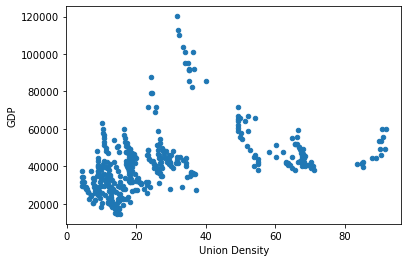

In [16]:
GDP_working_df.plot.scatter(x='Union Density', y='GDP')

# Group countries into regions

In [31]:
western = ['United Kingdom', 'Spain', 'Austria', 
            'France', 'Germany', 'Ireland', 
            'Switzerland', 'Italy', 'Luxembourg', 
            'Greece', 'Israel','Netherlands', 
            'Belgium', 'Australia', 'New Zealand', 
            'Portugal', 'Turkey', 'Canada']


east =  ['Estonia', 'Czech Republic', 'Latvia', 
             'Lithuania', 'Hungary', 'Slovak Republic', 
             'Slovenia', 'Poland'] 

scandinavian = ['Norway', 'Finland' ,'Iceland', 'Sweden', 'Denmark']

us = ['United States']

asia = ['Korea', 'Japan']

latin = ['Mexico', 'Chile']

In [32]:
west_df = pd.DataFrame({"Country": west})
east_df = pd.DataFrame({"Country": east})
scand_df = pd.DataFrame({"Country": scandinavian})
us_df = pd.DataFrame({"Country": us})
asia_df = pd.DataFrame({"Country": asia})
latin_df = pd.DataFrame({"Country": latin})

In [33]:
west_filter = pd.merge(GDP_working_df, west_df, on=["Country"])
east_filter = pd.merge(GDP_working_df, east_df, on=["Country"])
scand_filter = pd.merge(GDP_working_df, scand_df, on=["Country"])
us_filter = pd.merge(GDP_working_df, us_df, on=["Country"])
asia_filter = pd.merge(GDP_working_df, asia_df, on=["Country"])
latin_filter = pd.merge(GDP_working_df, latin_df, on=["Country"])

df = {
    "Western": {"df": west_filter, "x":0, "y":0, "color": "red"},
    "Eastern Europe": {"df": east_filter, "x":0, "y":1, "color": "blue"},
    "Scandanavia": {"df":scand_filter, "x":1, "y":0, "color": "green"},
    "US": {"df":us_filter, "x":1, "y":1, "color": "yellow"},
    "East Asia": {"df":asia_filter, "x":2, "y":0, "color": "pink"},
    "Latin American": {"df":latin_filter, "x":2, "y":1, "color": "purple"}
}

# Plot GDP and Union Density and Perform linear regression

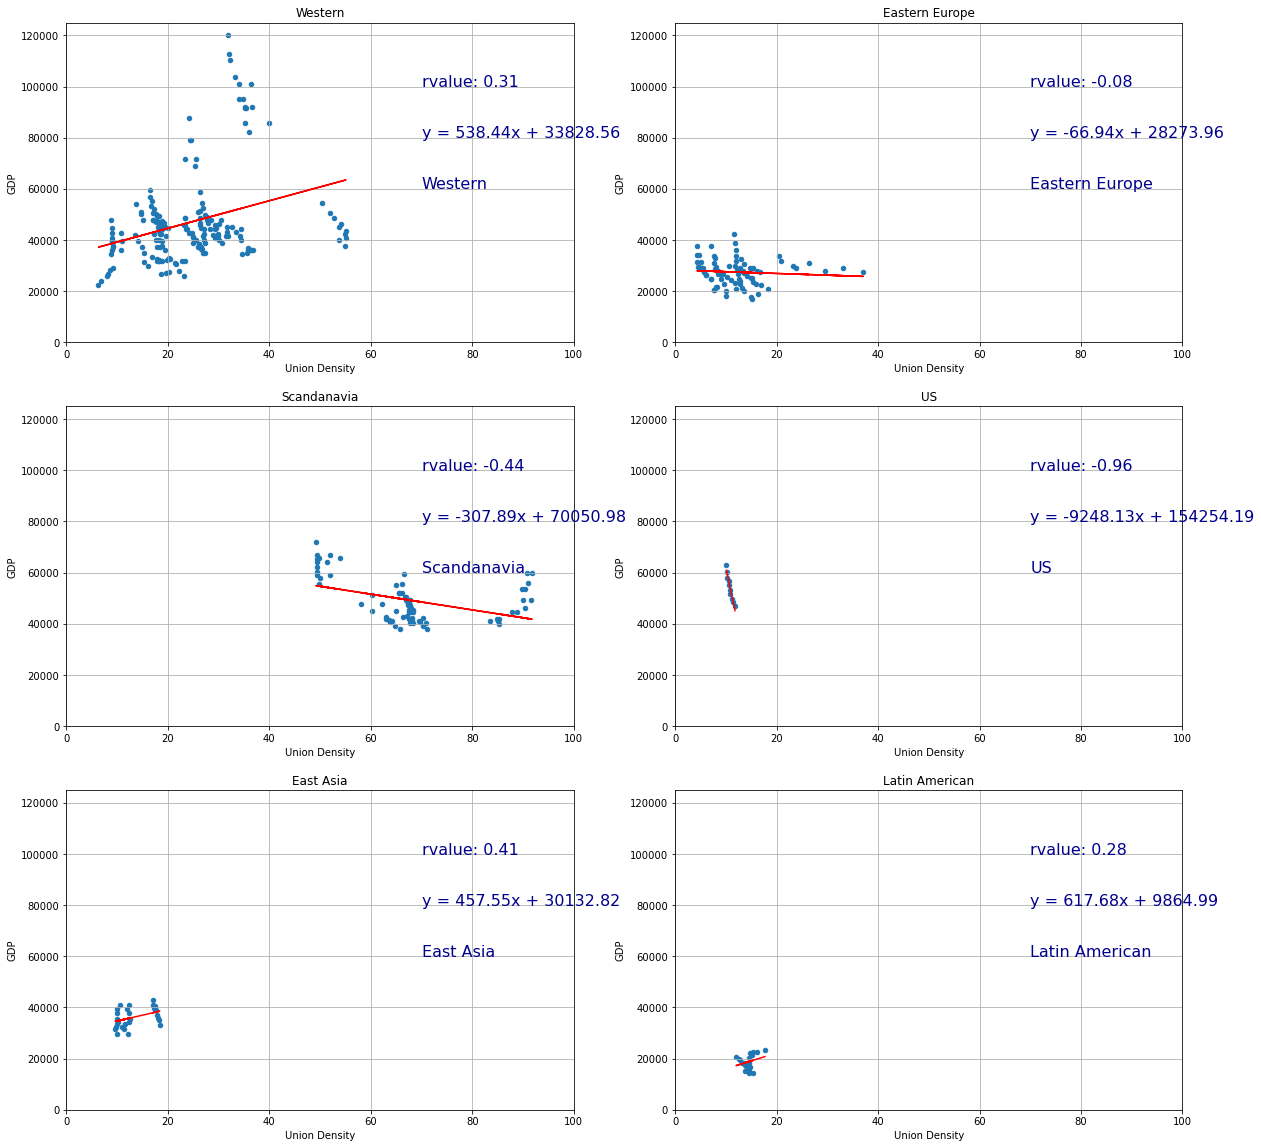

In [34]:
fig, ax = plt.subplots(3, 2, figsize=(20, 20))

for region in df:
    x_position=df[region]["x"]
    y_position=df[region]["y"]
    df[region]["df"].plot.scatter(x="Union Density", y="GDP", ax=ax[x_position][y_position], grid=True)
    ax[x_position][y_position].set_title(region)
    ax[x_position][y_position].set_ylim(0, 125000)
    ax[x_position][y_position].set_xlim(0, 100)
    
    x = df[region]["df"]["Union Density"]
    y = df[region]["df"]["GDP"]
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    ax[x_position][y_position].plot(x, regress_values, "r-")
    
    ax[x_position][y_position].annotate(region, (70,60000), fontsize=16, color="darkblue")
    ax[x_position][y_position].annotate(line_eq, (70,80000), fontsize=16, color="darkblue")
    ax[x_position][y_position].annotate(f"rvalue: {round(rvalue,2)}", (70,100000), fontsize=16, color="darkblue")

In [37]:
#Add "color" and "group" columns
GDP_working_df["Color"] = ""
GDP_working_df["Group"] = ""
GDP_working_df.head()

<ipython-input-37-5ead54b85c74>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GDP_working_df["Color"] = ""
<ipython-input-37-5ead54b85c74>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GDP_working_df["Group"] = ""


,Country,Year,Union Density,GDP,Color,Group
0,Hungary,2009,11.9,20689.04670,,
1,Hungary,2015,9.0,26777.47046,,
2,Hungary,2015,9.4,26777.47046,,
3,Poland,2009,16.3,19088.28902,,
4,Poland,2010,18.3,20828.98653,,


In [39]:
#iterate through df and assign values to new columns
for index, row in GDP_working_df.iterrows():
    if row["Country"] in west: 
        GDP_working_df.loc[index,"Group"] = "Western"
        GDP_working_df.loc[index,"Color"] = "b"
    if row["Country"] in east: 
        GDP_working_df.loc[index,"Group"] = "Eastern European" 
        GDP_working_df.loc[index,"Color"] = "g"
    if row["Country"] in scandinavian: 
        GDP_working_df.loc[index,"Group"] = "Scandinavia"
        GDP_working_df.loc[index,"Color"] = "r"
    if row["Country"] in us: 
        GDP_working_df.loc[index,"Group"] = "US" 
        GDP_working_df.loc[index,"Color"] = "p"
    if row["Country"] in asia: 
        GDP_working_df.loc[index,"Group"] = "East Asia" 
        GDP_working_df.loc[index,"Color"] = "y"
    if row["Country"] in latin: 
        GDP_working_df.loc[index,"Group"] = "Latin America"
        GDP_working_df.loc[index,"Color"] = "t"
GDP_working_df.head()

C:\Users\berry\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,Country,Year,Union Density,GDP,Color,Group
0,Hungary,2009,11.9,20689.04670,g,Eastern European
1,Hungary,2015,9.0,26777.47046,g,Eastern European
2,Hungary,2015,9.4,26777.47046,g,Eastern European
3,Poland,2009,16.3,19088.28902,g,Eastern European
4,Poland,2010,18.3,20828.98653,g,Eastern European


# Calculate statistical outliers

In [58]:
gdp=GDP_working_df["GDP"]
quartiles=gdp.quantile([.25,.5,.75])
lowerq=quartiles[0.25]
upperq=quartiles[.75]
gdpiqr=upperq - lowerq
gdplower_bound=lowerq-(1.5*gdpiqr)
gdpupper_bound=upperq+(1.5*gdpiqr)
print(f"The IQR is: {gdpiqr}")
gdp_outliers=GDP_working_df.loc[(GDP_working_df['GDP'] < gdplower_bound) | (GDP_working_df['GDP'] > gdpupper_bound)]
print("STATISTICAL OUTLIERS:")
gdp_outliers

The IQR is: 15697.521379999998
STATISTICAL OUTLIERS:


,Country,Year,Union Density,GDP,Color,Group
57,Norway,2018,49.2,71909.29958,r,Scandinavia
135,Ireland,2016,25.6,71793.28575,b,Western
136,Ireland,2016,23.4,71793.28575,b,Western
137,Ireland,2017,24.5,78990.82586,b,Western
138,Ireland,2017,24.3,78990.82586,b,Western
178,Luxembourg,2009,35.9,82249.99851,b,Western
179,Luxembourg,2010,35.1,85587.01465,b,Western
180,Luxembourg,2010,40.0,85587.01465,b,Western
181,Luxembourg,2011,35.1,91814.03661,b,Western
182,Luxembourg,2011,36.6,91814.03661,b,Western


In [63]:
filtered_df=gdp_outliers.loc[[GDP_working_df.index]]

KeyError: "None of [Index([(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...)], dtype='object')] are in the [index]"

In [61]:
print(len(gdp_outliers))

21


In [42]:
from matplotlib import cm
cmap = cm.get_cmap('Spectral')

In [46]:
ud=GDP_working_df["Union Density"]
quartiles=ud.quantile([.25,.5,.75])
lowerq=quartiles[0.25]
upperq=quartiles[.75]
udiqr=upperq - lowerq
udlower_bound=lowerq-(1.5*udiqr)
udupper_bound=upperq+(1.5*udiqr)
print(f"The IQR is: {udiqr}")
ud_outliers=GDP_working_df.loc[(GDP_working_df['Union Density'] < udlower_bound) | (GDP_working_df['Union Density'] > udupper_bound)]
print("STATISTICAL OUTLIERS:")
ud_outliers

The IQR is: 22.3
STATISTICAL OUTLIERS:


,Country,Year,Union Density,GDP,Color,Group
13,Sweden,2009,70.8,40309.17759,r,Scandinavia
15,Sweden,2010,70.2,42256.28007,r,Scandinavia
58,Iceland,2011,83.4,40938.66455,r,Scandinavia
59,Iceland,2011,85.0,40938.66455,r,Scandinavia
60,Iceland,2013,87.8,44404.73159,r,Scandinavia
61,Iceland,2013,88.9,44404.73159,r,Scandinavia
62,Iceland,2015,90.0,49203.29499,r,Scandinavia
63,Iceland,2015,91.6,49203.29499,r,Scandinavia
64,Iceland,2016,89.8,53486.61577,r,Scandinavia
65,Iceland,2016,90.4,53486.61577,r,Scandinavia


In [49]:
GDP_working_df

,Country,Year,Union Density,GDP,Color,Group
0,Hungary,2009,11.9,20689.04670,g,Eastern European
1,Hungary,2015,9.0,26777.47046,g,Eastern European
2,Hungary,2015,9.4,26777.47046,g,Eastern European
3,Poland,2009,16.3,19088.28902,g,Eastern European
4,Poland,2010,18.3,20828.98653,g,Eastern European
...,...,...,...,...,...,...
396,United States,2014,10.7,55008.01240,p,US
397,United States,2015,10.6,56831.65482,p,US
398,United States,2016,10.3,58000.88803,p,US
399,United States,2017,10.3,60091.56878,p,US


In [47]:
GDP_wo_outliers_df=GDP_working_df.drop([171,172,173,174,178,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,307,94,96,98,100,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,346])

In [48]:
GDP_wo_outliers_df

,Country,Year,Union Density,GDP,Color,Group
0,Hungary,2009,11.9,20689.04670,g,Eastern European
1,Hungary,2015,9.0,26777.47046,g,Eastern European
2,Hungary,2015,9.4,26777.47046,g,Eastern European
3,Poland,2009,16.3,19088.28902,g,Eastern European
4,Poland,2010,18.3,20828.98653,g,Eastern European
...,...,...,...,...,...,...
396,United States,2014,10.7,55008.01240,p,US
397,United States,2015,10.6,56831.65482,p,US
398,United States,2016,10.3,58000.88803,p,US
399,United States,2017,10.3,60091.56878,p,US


The Union Density IQR is: 22.3
The GDP IQR is: 15697.521379999998
Coefficient of Determination: 0.4927855196185357


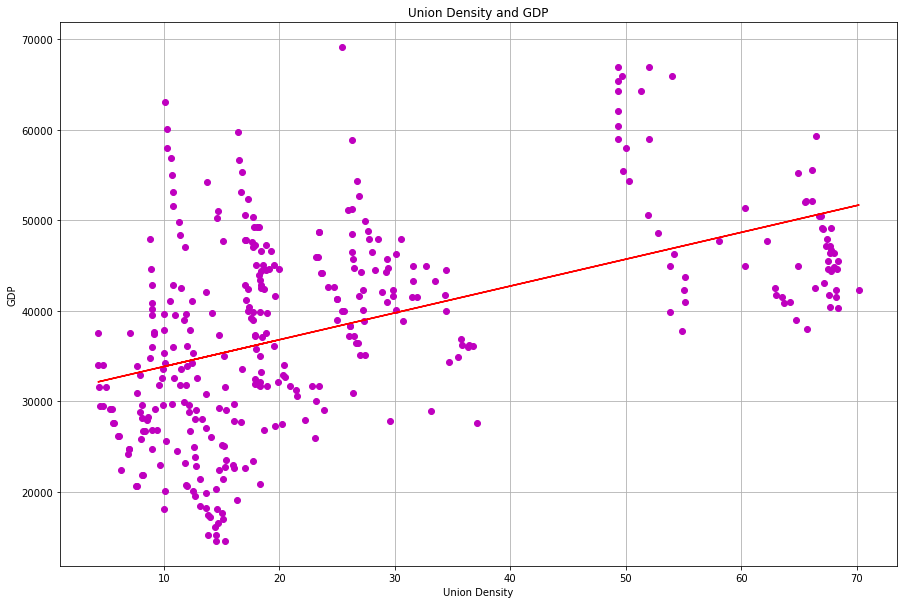

In [42]:
plt.figure(figsize=(15,10))
x=GDP_wo_outliers_df["Union Pct"].values.reshape(-1,1)
y=GDP_wo_outliers_df["GDP"].values.reshape(-1,1)
slope, intercept, r_value, p_value, std_err = stats.linregress(x[:,0], y[:,0])
plt.plot(x,y,"o",color="m")
plt.plot(x,intercept+slope*x,"r")
plt.grid(True)
plt.title("Union Density and GDP")
plt.xlabel("Union Density")
plt.ylabel("GDP")
print(f"The Union Density IQR is: {udiqr}")
print(f"The GDP IQR is: {gdpiqr}")
print(f'Coefficient of Determination: {r_value}')
plt.savefig("gdpwooutliers.png")